In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from PIL import Image

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage


import glob as glob
print(tf.__version__)

1.12.0


In [37]:
files = glob.glob('/scratch/esim/misc/crumple_fit/*png')

In [38]:
len(files)

31778

In [39]:
files1 = glob.glob('/scratch/esim/misc/crumple_fit/Fold_1_*png')
files2 = glob.glob('/scratch/esim/misc/crumple_fit/Fold_2_*png')
files3 = glob.glob('/scratch/esim/misc/crumple_fit/Fold_3_*png')
files4 = glob.glob('/scratch/esim/misc/crumple_fit/Fold_4_*png')
files5 = glob.glob('/scratch/esim/misc/crumple_fit/Fold_5_*png')
files6 = glob.glob('/scratch/esim/misc/crumple_fit/Fold_6_*png')
files7 = glob.glob('/scratch/esim/misc/crumple_fit/Fold_7_*png')
files8 = glob.glob('/scratch/esim/misc/crumple_fit/Fold_8_*png')
files9 = glob.glob('/scratch/esim/misc/crumple_fit/Fold_9_*png')
files10 = glob.glob('/scratch/esim/misc/crumple_fit/Fold_10_*png')

In [40]:
files = np.random.permutation(files1 + files2 + files3 + files4 + files5 + files6 + files7 + files8 + files9 + files10)
n_classes = 10

In [41]:
L = len(files)
L

31790

In [42]:
train_fraction = 0.8
N_train = int(train_fraction*L)
N_test = L - N_train
N_train_augmented = 4*N_train # rotate the dataset 

In [44]:
x_train = np.zeros((N_train*4,100,100,1))
y_train = np.zeros(N_train*4)
x_test = np.zeros((N_test,100,100,1))
y_test = np.zeros(N_test)

In [51]:
img = Image.open(files[214])
label = int(files[214].split('_')[2]) # the label is in the file name i.e. Flat_N_n_*.png
A=np.asarray(img)
    # Scale between 0 and 1. 
A = A/255.0

In [52]:
label

8

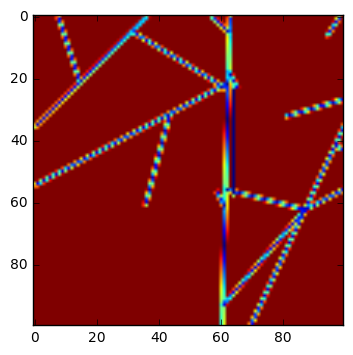

In [56]:
plt.imshow(A[:,:,0])
plt.show()

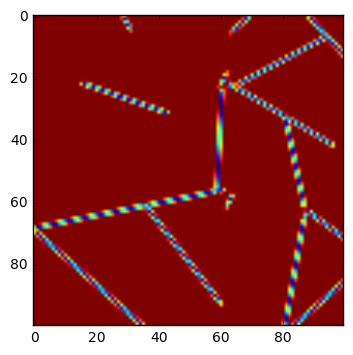

In [57]:
plt.imshow(A[:,:,2])
plt.show()

In [71]:
for i in range(N_train):
    img = Image.open(files[i])
    label = int(files[i].split('_')[2]) # the label is in the file name i.e. Flat_N_n_*.png
    A=np.asarray(img)
    # Scale between 0 and 1. 
    A = A/255.0

    # Convert RGB image to greyscale. 
    R = 1.0 -A[:,:,0]
    B = 1.0 - A[:,:,2]
    # Convert RGB image to greyscale. 
    A_grey =   R - B #np.mean(A, -1) 

    # Downsize the image
    # A_grey_zoom = scipy.ndimage.zoom(A_grey, 0.25, order=2)
    x_train[i][:,:,0] = A_grey
    y_train[i] = label-1
    
# Add to the training set -- transpose
for i in range(N_train):
    x_train[i+N_train][:,:,0] = x_train[i][:,:,0].transpose()
    y_train[i+N_train] = y_train[i]
    
# Add to the training set -- flip the data
for i in range(N_train):
    x_train[i+2*N_train][:,:,0] = np.flipud(x_train[i][:,:,0])
    y_train[i+2*N_train] = y_train[i]
    
# Add to the training set -- flip the data
for i in range(N_train):
    x_train[i+3*N_train][:,:,0] = np.fliplr(x_train[i][:,:,0])
    y_train[i+3*N_train] = y_train[i]    

# Compute the test set
for i in range(N_test):
    j = i+N_train 
    img = Image.open(files[j])
    label = int(files[j].split('_')[2]) 
    A=np.asarray(img)
    # Scale between 0 and 1. 
    A = A/255.0

    R = 1.0 -A[:,:,0]
    B = 1.0 - A[:,:,2]
    # Convert RGB image to greyscale. 
    A_grey =   R - B#np.mean(A, -1) 

    # Downsize the image
    # A_grey_zoom = scipy.ndimage.zoom(A_grey, 0.25, order=1)
    x_test[i][:,:,0] = A_grey
    y_test[i] = label-1 

In [72]:
x_train = np.sign(x_train)
x_test = np.sign(x_test)

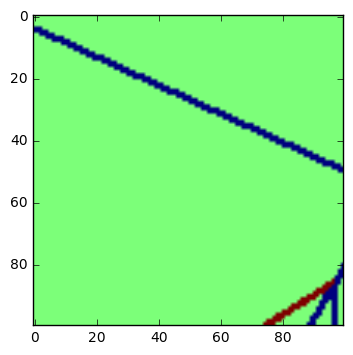

In [73]:
plt.imshow(x_train[100,:,:,0])
plt.show()

In [70]:
np.amax(x_train[100,:,:,0]-1)

0.96078431372549034

In [15]:
y_test[0:20]

array([ 0.,  1.,  8.,  0.,  1.,  0.,  5.,  9.,  7.,  2.,  5.,  5.,  8.,
        6.,  0.,  0.,  1.,  9.,  2.,  3.])

# Model 1

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(64, 64, 1)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=15)

In [202]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

6156/6156 [==============================] - 1s 115us/step
Test accuracy: 0.40367121511345333


In [203]:
predictions = model.predict(x_test)

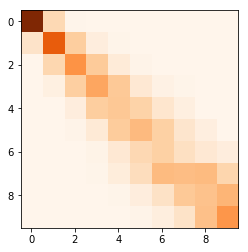

In [204]:
mat = np.zeros((n_classes,n_classes))
for i in range(N_test):
    mat[np.argmax(predictions[i]),int(y_test[i])] += 1
plt.imshow(mat,cmap='Oranges')

# Model 2

In [17]:
model = keras.Sequential([
    keras.layers.Conv2D(kernel_size=(3,3),filters=8,input_shape=(64, 64, 1)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.8),
    keras.layers.Dense(n_classes, activation=tf.nn.softmax)
])

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 8)         80        
_________________________________________________________________
flatten_1 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3936384   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 3,937,754
Trainable params: 3,937,754
Non-trainable params: 0
_________________________________________________________________


In [120]:
model = keras.Sequential([
    keras.layers.Conv2D(kernel_size=(3,3),filters=8,input_shape=(100,100, 1)),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Conv2D(kernel_size=(3,3),filters=16),
        keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.8),
    keras.layers.Dense(n_classes, activation=tf.nn.softmax)
])

In [103]:
model = keras.Sequential([
    keras.layers.Conv2D(kernel_size=(3,3),filters=16,input_shape=(100,100, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Conv2D(kernel_size=(3,3),filters=32),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Conv2D(kernel_size=(3,3),filters=64),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Conv2D(kernel_size=(3,3),filters=128),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Conv2D(kernel_size=(3,3),filters=256),
    keras.layers.Flatten(),
    #keras.layers.Dense(50, activation=tf.nn.relu),
    keras.layers.Dense(1000, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(500, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(50, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(n_classes, activation=tf.nn.softmax)
])

In [128]:
model = keras.Sequential([
    keras.layers.Conv2D(kernel_size=(3,3),filters=8,input_shape=(100,100, 1)),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Conv2D(kernel_size=(3,3),filters=16),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1208, activation=tf.nn.relu),
    keras.layers.Dropout(0.8),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.8),
    keras.layers.Dense(n_classes, activation=tf.nn.softmax)
])

In [129]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 98, 98, 8)         80        
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 49, 49, 8)         0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 47, 47, 16)        1168      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 23, 23, 16)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 8464)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 1208)              10225720  
_________________________________________________________________
dropout_30 (Dropout)         (None, 1208)              0         
__________

In [130]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [123]:
model.fit(x_train, y_train, epochs=15,validation_data=(x_test,y_test))

Train on 101728 samples, validate on 6358 samples
Epoch 1/15
101728/101728 [==============================] - 198s 2ms/step - loss: 1.5147 - acc: 0.3531 - val_loss: 1.2465 - val_acc: 0.4715
Epoch 2/15
101728/101728 [==============================] - 198s 2ms/step - loss: 1.3767 - acc: 0.4026 - val_loss: 1.2678 - val_acc: 0.4547
Epoch 3/15
101728/101728 [==============================] - 200s 2ms/step - loss: 1.3421 - acc: 0.4153 - val_loss: 1.2140 - val_acc: 0.4836
Epoch 4/15
101728/101728 [==============================] - 200s 2ms/step - loss: 1.3209 - acc: 0.4246 - val_loss: 1.2132 - val_acc: 0.4931
Epoch 5/15
101728/101728 [==============================] - 200s 2ms/step - loss: 1.3015 - acc: 0.4332 - val_loss: 1.1637 - val_acc: 0.5025
Epoch 6/15
101728/101728 [==============================] - 200s 2ms/step - loss: 1.2908 - acc: 0.4376 - val_loss: 1.1923 - val_acc: 0.4879
Epoch 7/15
101728/101728 [==============================] - 200s 2ms/step - loss: 1.2776 - acc: 0.4408 - val_l

In [131]:
model.fit(x_train, y_train, epochs=15,validation_data=(x_test,y_test))

Train on 101728 samples, validate on 6358 samples
Epoch 1/15
101728/101728 [==============================] - 261s 3ms/step - loss: 1.5668 - acc: 0.3343 - val_loss: 1.2819 - val_acc: 0.4552
Epoch 2/15
101728/101728 [==============================] - 261s 3ms/step - loss: 1.4012 - acc: 0.3912 - val_loss: 1.2658 - val_acc: 0.4533
Epoch 3/15
101728/101728 [==============================] - 262s 3ms/step - loss: 1.3668 - acc: 0.4034 - val_loss: 1.2064 - val_acc: 0.4893
Epoch 4/15
101728/101728 [==============================] - 262s 3ms/step - loss: 1.3439 - acc: 0.4143 - val_loss: 1.2489 - val_acc: 0.4718
Epoch 5/15
101728/101728 [==============================] - 262s 3ms/step - loss: 1.3376 - acc: 0.4203 - val_loss: 1.2419 - val_acc: 0.4750
Epoch 6/15
101728/101728 [==============================] - 262s 3ms/step - loss: 1.3244 - acc: 0.4236 - val_loss: 1.1971 - val_acc: 0.4928
Epoch 7/15
101728/101728 [==============================] - 263s 3ms/step - loss: 1.3151 - acc: 0.4288 - val_l

In [124]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

6358/6358 [==============================] - 3s 429us/step
('Test accuracy:', 0.49087763446687566)


In [125]:
predictions = model.predict(x_test)

In [126]:
np.sum(mat[0])

1.0

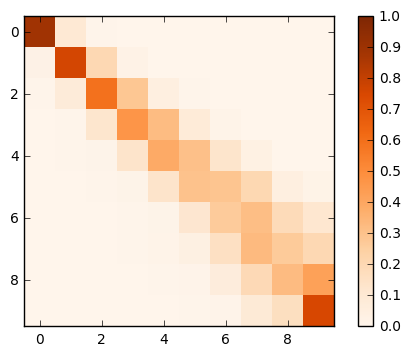

In [127]:
plt.clf()
mat = np.zeros((n_classes,n_classes))
for i in range(len(y_test)):
    mat[np.argmax(predictions[i]),int(y_test[i])] += 1
for i in range(n_classes):
    mat[i] /= np.sum(mat[i])
plt.imshow(mat,cmap='Oranges',interpolation='none')
plt.colorbar()
plt.clim(0,1)
plt.show()

In [9]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [145]:
train_images.shape

(60000, 28, 28)

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
train_images.shape

(60000, 28, 28)

In [13]:
len(train_labels)

60000

In [14]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
test_images.shape

(10000, 28, 28)

In [17]:
len(test_images)

10000

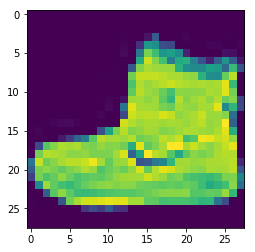

In [22]:
plt.figure()
plt.imshow(train_images[0])
plt.grid(False)

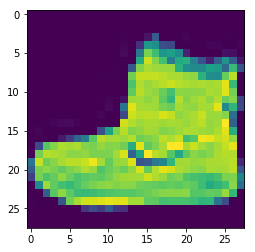

In [23]:
plt.figure()
plt.imshow(train_images[0])

In [24]:
train_images = train_images / 255.0

test_images = test_images / 255.0

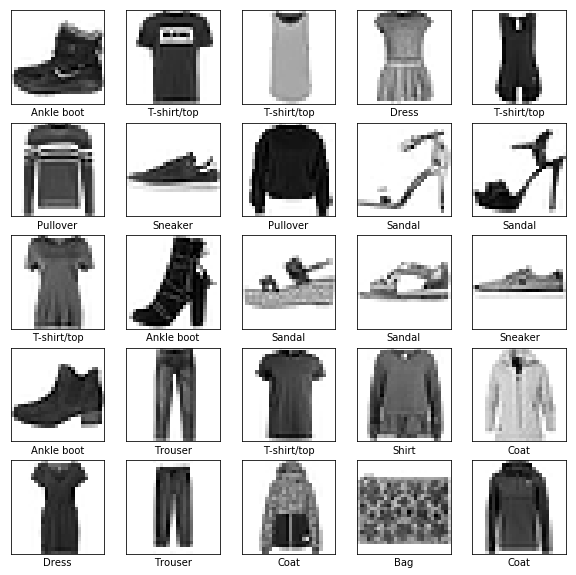

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28,1)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

In [27]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 92us/step - loss: 0.5003 - acc: 0.8227
Epoch 2/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.3729 - acc: 0.8659
Epoch 3/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.3363 - acc: 0.8774
Epoch 4/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.3130 - acc: 0.8860
Epoch 5/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.2965 - acc: 0.8904


In [29]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 37us/step
Test accuracy: 0.8724


In [31]:
predictions = model.predict(test_images)

In [32]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

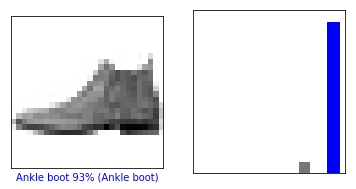

In [33]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)